<a href="https://colab.research.google.com/github/EkabhiramGedela/AI-ML_Project_and_labs/blob/main/AIML_Module_4_Lab_1_Perceptron_and_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Student Training Program on AIML**
# Module 4: Perceptron and Gradient Descent
## Lab 1: Perceptron

In this lab, we will be studying the perceptron learning algorithm.

In [ ]:
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

First we need to define a labeled data set. Let's make a toy dataset.

In [ ]:
X = np.array([
    [-2, 4],
    [4, 1],
    [1, 6],
    [2, 4],
    [6, 2]
])

Next we need to add a bias term -1 into the data set.

In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, 1, 1])

This small toy data set contains two samples labeled with −1 and three samples labeled with +1. This means we have a binary classification problem, as the data set contains two sample classes. Lets plot the dataset to see, that is is linearly seperable

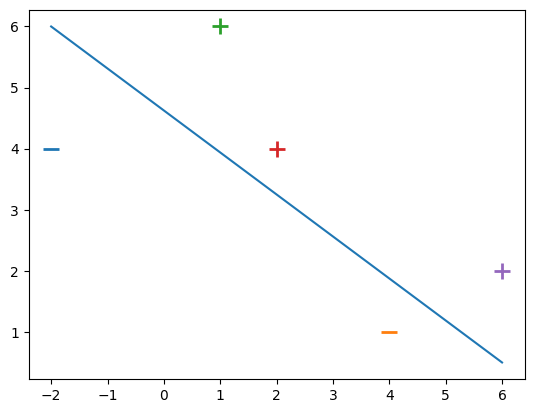

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Print a possible hyperplane, that is seperating the two classes.
plt.plot([-2, 6], [6, 0.5])

Finally we can code our Perceptron algorithm using our update rule. To keep it simple, we will linearly loop over the sample set. For larger data sets it makes sence, to randomly pick a sample during each iteration in the for-loop.

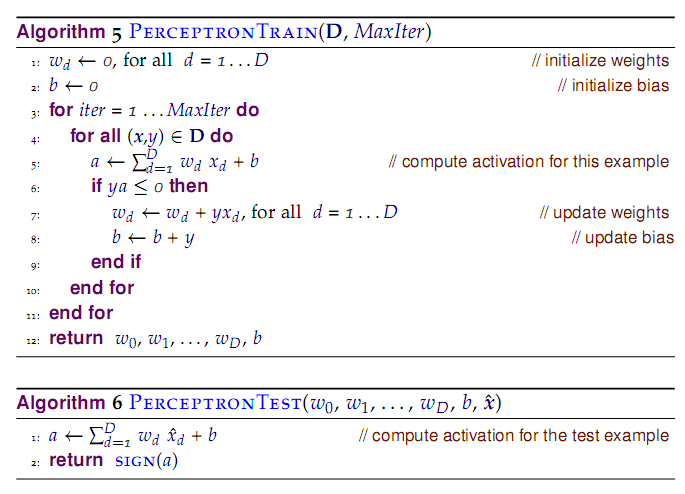

The algorithm is shown in the above image.

In [ ]:
def perceptron_algo(X, Y):
    w = np.zeros(len(X[0]))
    eta = 1
    epochs = 10

    for epoch in range(epochs):
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                w = w + eta * X[i] * Y[i]
    return w

In [ ]:
def perceptron_algo_plot(X, Y):
    '''
    train perceptron and plot the total loss in each epoch.

    :param X: data samples
    :param Y: data labels
    :return: weight vector as a numpy array
    '''
    w = np.zeros(len(X[0]))
    eta = 1
    n = 30
    errors = []

    for t in range(n):
        total_error = 0
        for i, x in enumerate(X):
            if (np.dot(X[i], w) * Y[i]) <= 0:
                total_error += (np.dot(X[i], w) * Y[i])
                w = w + eta * X[i] * Y[i]
        errors.append(total_error * -1)

    plt.plot(errors)
    plt.xlabel('Epoch')
    plt.ylabel('Total Loss')

    return w

Next, we will see the the training error at each epoch.

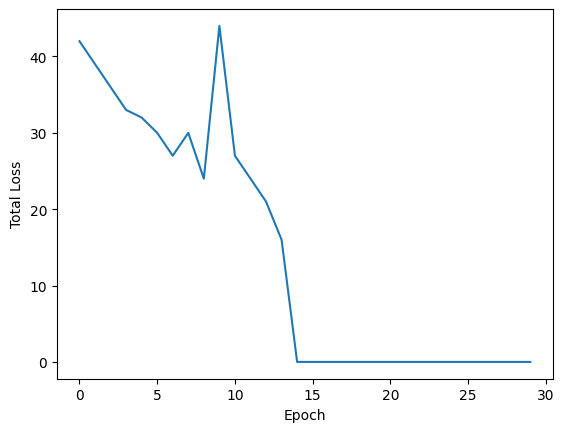

In [ ]:
w = perceptron_algo_plot(X, y)

We now plot the decision boundary and check which samples have been classified as positive and which samples have been classified as negative.

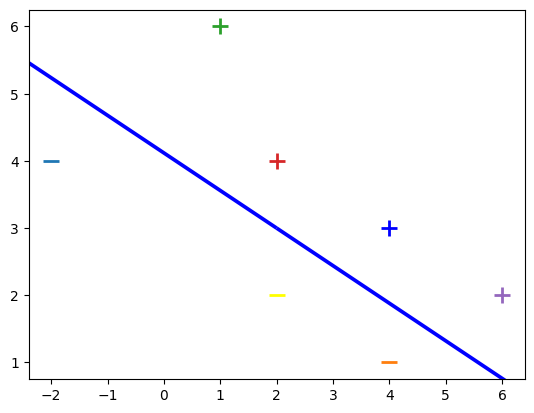

In [ ]:
for d, sample in enumerate(X):
    # Plot the negative samples
    if d < 2:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positive samples
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)

# Add our test samples

plt.scatter(2, 2, s=120, marker='_', linewidths=2, color='yellow')
plt.scatter(4, 3, s=120, marker='+', linewidths=2, color='blue')

# Print the hyperplane calculated by perceptron_sgd()
x2 = [w[0], w[1], -w[1], w[0]]
x3 = [w[0], w[1], w[1], -w[0]]

x2x3 = np.array([x2, x3])
X, Y, U, V = zip(*x2x3)
ax = plt.gca()
ax.quiver(X, Y, U, V, scale=1, color='blue')

As you can see, our algorithm has correctly classified all the samples. The decision boundary is shown in blue.

# Things to try


1.   Try this on a real dataset like the Sonar dataset or the Banknote Dataset and show the error plot.
2.   Increase/decrease the learning rate to see how many iterations will be take to coverge. Does it even converge on a huge learning rate?
4. Take a toy dataset that is not linearly separable and run the perceptron algorithm on it. What happens? Note your observations. An example is given below.



Trying this on a real dataset like the Sonar dataset or the Banknote Dataset and showing the error plot.Increase/decrease the learning rate to seeing how many iterations will be take to coverge.

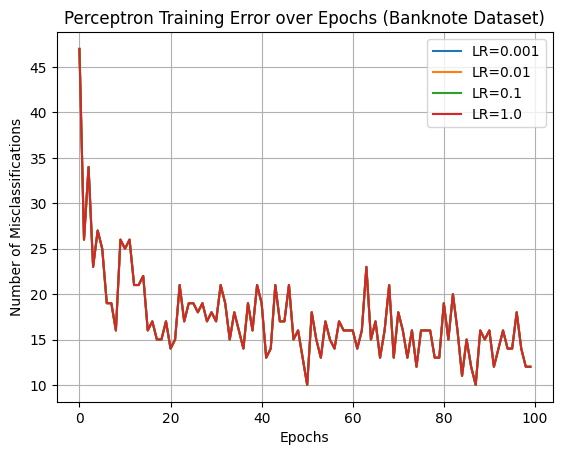

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the Banknote Authentication dataset from UCI
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00267/data_banknote_authentication.txt"

# The dataset has no headers
columns = ['variance', 'skewness', 'curtosis', 'entropy', 'class']
df = pd.read_csv(url, header=None, names=columns)

# Split features and labels
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

# Normalize features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Simple Perceptron from scratch
class PerceptronCustom:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        errors = []

        for _ in range(self.epochs):
            total_error = 0
            for xi, target in zip(X, y):
                prediction = self.predict(xi)
                update = self.learning_rate * (target - prediction)
                self.weights += update * xi
                self.bias += update
                total_error += int(update != 0.0)
            errors.append(total_error)
        return errors

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0.0, 1, 0)

# Try different learning rates
learning_rates = [0.001, 0.01, 0.1, 1.0]

for lr in learning_rates:
    model = PerceptronCustom(learning_rate=lr, epochs=100)
    errors = model.fit(X_train, y_train)

    plt.plot(errors, label=f'LR={lr}')

plt.title('Perceptron Training Error over Epochs (Banknote Dataset)')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.legend()
plt.grid(True)
plt.show()


Example of non-linearly separable toy dataset (XOR)

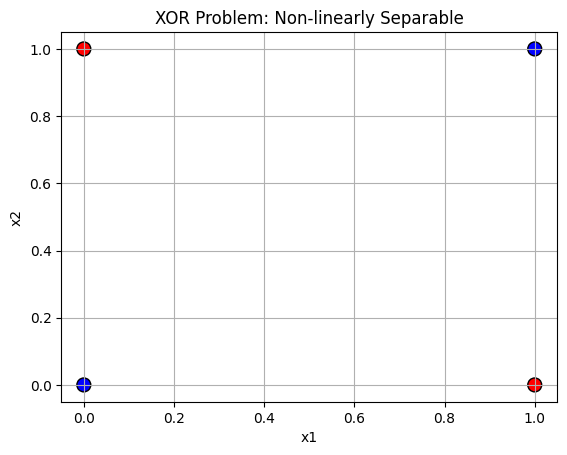

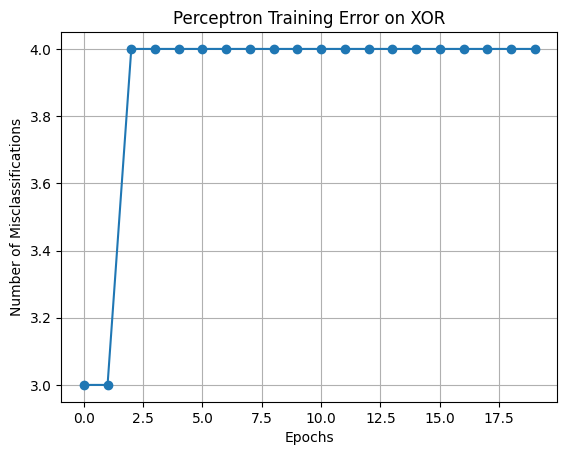

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define XOR inputs and labels
X = np.array([[0, 0],
              [0, 1],
              [1, 0],
              [1, 1]])
y = np.array([0, 1, 1, 0])  # XOR labels

# Plot the XOR data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr', edgecolors='k', s=100)
plt.title('XOR Problem: Non-linearly Separable')
plt.xlabel('x1')
plt.ylabel('x2')
plt.grid(True)
plt.show()

# Define simple perceptron
class Perceptron:
    def __init__(self, learning_rate=0.1, epochs=10):
        self.lr = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = 0

    def fit(self, X, y):
        self.weights = np.zeros(X.shape[1])
        self.bias = 0
        errors = []

        for _ in range(self.epochs):
            total_error = 0
            for xi, yi in zip(X, y):
                y_pred = self.predict(xi)
                update = self.lr * (yi - y_pred)
                self.weights += update * xi
                self.bias += update
                total_error += int(update != 0)
            errors.append(total_error)
        return errors

    def predict(self, X):
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)

# Train perceptron on XOR
model = Perceptron(learning_rate=0.1, epochs=20)
errors = model.fit(X, y)

# Plot the number of misclassifications per epoch
plt.plot(errors, marker='o')
plt.title('Perceptron Training Error on XOR')
plt.xlabel('Epochs')
plt.ylabel('Number of Misclassifications')
plt.grid(True)
plt.show()


In [ ]:
X = np.array([
    [-2, 4, -1],
    [4, 1, -1],
    [1, 6, -1],
    [2, 4, -1],
    [6, 2, -1],
])

In [ ]:
y = np.array([-1, -1, 1, -1, -1])

In [ ]:
print(perceptron_algo_plot(X, y))

If the training data is not Linearly Separable, the perceptron algorithm will eventually repeat the same set of weights and thereby enter an infinite loop.

## **Additional Critical Thinking Questions**

1. Consider the following dataset where x = (x1, x2) ∈ {0, 1}× {0, 1}, y ∈ {−, +}. Note that this dataset is corresponding to the boolean function “AND” over the 2-bit binary input.

  Suppose we are training a Perceptron to learn on this dataset and we initialize w0 = 0 and b0 = 0.

  Please i) answer if this dataset is learnable by Perceptron, and ii) if so, write down the weights update procedure for each iteration; if not, explain why.


2. Extending AND to any boolean functions over a 2-bit binary input, where we have (2^2)^2 = 16 possible distinct boolean functions in total, among which how many of them can be learnable by a Perceptron?

  Please also write down the truth table(s) of the boolean functions that are not learnable, if there are any.

i) Is the AND dataset learnable by a Perceptron?

Ans: Yes, the AND function is linearly separable.
The Perceptron algorithm can successfully learn a separating hyperplane.
Starting from weights [0, 0] and bias 0, the algorithm converges after a few updates.
Each misclassified point triggers a weight and bias update using the Perceptron rule.
Eventually, all training samples are correctly classified, confirming learnability.



ii) Weight update procedure for each iteration (AND function)

ANS:
Start with w = [0, 0], b = 0.
Iterate over the samples and compute predictions using sign(w·x + b).
Update weights with w = w + η * y * x, and bias with b = b + η * y, when prediction ≠ actual.
Repeat this process over multiple epochs.
The updates stop when all inputs are correctly classified — indicating convergence.



iii) How many of the 16 boolean functions are learnable by a Perceptron?

ANS:
There are
2^
4
=
16
2^
4
 =16 Boolean functions over 2-bit binary input.
Out of these, 14 are linearly separable, so they are learnable by a Perceptron.
The remaining 2 functions — XOR and XNOR — are not linearly separable.
These two cannot be separated using a single straight line in input space.
Thus, only 14 out of 16 functions are learnable by a single-layer Perceptron.

iv) Truth tables of functions not learnable (XOR & XNOR)

ANS:
XOR:
(0,0) → 0
(0,1) → 1
(1,0) → 1
(1,1) → 0

XNOR:
(0,0) → 1
(0,1) → 0
(1,0) → 0
(1,1) → 1

These cannot be linearly separated, so a Perceptron cannot learn them.